In [1]:
# data process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import pint

In [3]:
ureg = pint.UnitRegistry()

In [20]:
with open('fig3b.dat') as f:
    data = []
    tmp = []
    for line in f:
        line = line.strip()
        if line == '':
            data.append(np.array(tmp))
            tmp = []
            continue
        x, y = line.strip().split()
        tmp.append((float(x), - float(y)))
    data.append(np.array(tmp))

In [21]:
axis = data[0][:2]
points = data[0][2:-2]
labels = data[0][-2:]

In [22]:
axis

array([[ 116.75 , -562.75 ],
       [1674.625, -562.75 ]])

In [23]:
labels

array([[ 895.875, -562.25 ],
       [1285.5  , -562.5  ]])

In [11]:
zero_px = axis[0]
x_max_px = axis[1,0] - zero_px[0]
print(zero_px)
print(x_max_px)

[ 116.75 -562.75]
1557.875


In [30]:
lin_setp = 20/(- labels[0,0] + labels[1,0])

In [31]:
# l = [zero_px[0].tolist()] + labels[:,0].tolist()
# tmp = 0
# for idx in range(len(l)-1):
#     tmp += (l[idx + 1] - l[idx])
# tmp /= (len(l)-1)
# lin_setp = 20/tmp

In [32]:
def scale_linear(v, d_min, d_max):
    return v * (d_max - d_min) + d_min

In [37]:
x = (points[:,0] - zero_px[0]) * lin_setp
y = points[:,1].copy()
y -= y.min()
integral = np.trapz(y, x)
y /= integral

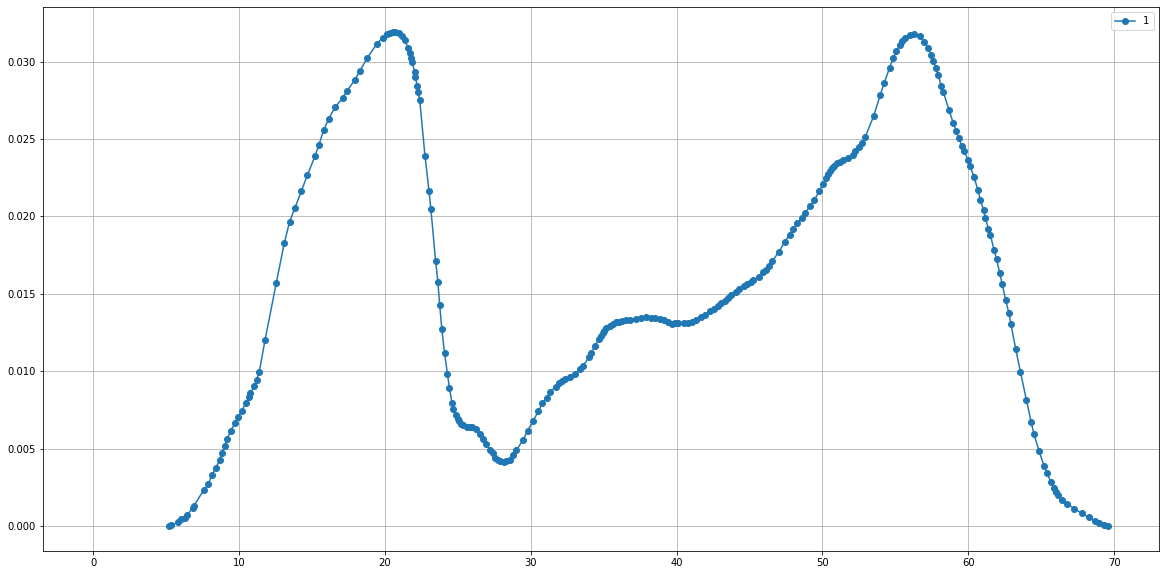

In [38]:
fig, ax = plt.subplots(1,1, figsize=(20,10), sharex=False)
ax.plot(x,y, 'o-', label=idx)
ax.plot([0], [0])
# ax.set_yscale('log')
ax.grid(which='both')
ax.legend()

In [39]:
import pandas as pd

In [40]:
tmp = np.vstack([x,y]).T
df = pd.DataFrame(tmp, columns=['meV','value'])

In [41]:
df

meV     value
0     5.165223  0.000000
1     5.332050  0.000065
2     5.806866  0.000236
3     5.986526  0.000448
4     6.249599  0.000554
..         ...       ...
243  68.257940  0.000570
244  68.687841  0.000309
245  69.002246  0.000187
246  69.284568  0.000090
247  69.586141  0.000000

[248 rows x 2 columns]

In [42]:
df.to_csv('fig_3b.csv')